## Cows and food one way ANOVA test

### Hypothesis
To improve the lives of dairy cows, a researcher examined 3 types of foods. He wants to assess cows preferences for one food over the other. The researcher gave the cows each type of food: A, B and C. There are 9 cows in total, 3 for each group.

Our independent variable is type of food. Our dependent variable is the amount of food eaten in pounds. Our null hypothesis is that cows will eat similar amounts of food, whereas the alternative hypothesis is that at least two groups will significantly differ. That means that cows will eat more or less of at least one food over another:

$$H_0:\mu_A=\mu_B=\mu_C$$
$$H_A:\mu_A=\mu_B\not=\mu_C$$

### Look at the data

In [1]:
import pandas as pd

data = {'Food A': [2, 4, 3], 'Food B': [6, 5, 7], 'Food C': [8, 9, 10]}
df = pd.DataFrame(data)

print(df.describe())

       Food A  Food B  Food C
count     3.0     3.0     3.0
mean      3.0     6.0     9.0
std       1.0     1.0     1.0
min       2.0     5.0     8.0
25%       2.5     5.5     8.5
50%       3.0     6.0     9.0
75%       3.5     6.5     9.5
max       4.0     7.0    10.0


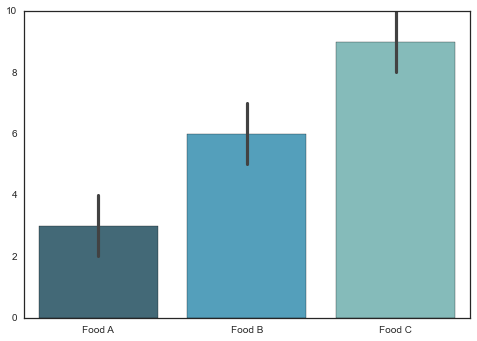

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

sns.barplot(data=df, palette='GnBu_d')

### F-statistic and F-critical value

Our degrees of freedom for between group variability is 2, and our degrees of freedom for withing group variability is 6. F-critical value, therefore, equals 5.14.

In [3]:
from scipy import stats

rvs1 = df['Food A']
rvs2 = df['Food B']
rvs3 = df['Food C']

f_val, p_val = stats.f_oneway(rvs1, rvs2, rvs3)

print 'F-value: {0}'.format(round(f_val, 2))
print 'p-value: {0}'.format(round(p_val, 3))

F-value: 27.0
p-value: 0.001


### Conclusion

Our F-value is greater than our F-critical value, and our p-value is less than alpha level 0.05. Therefore, we will regect the null hypothesis. At least two groups significantly differ from each other in terms of the amount eaten by the cows.

### Cohen's d

Cohen's d is an effect size used to indicate the standardised difference between two means. It is an appropriate effect size for the comparison between two means.

In [4]:
from __future__ import division 
from numpy import mean, std 
from math import sqrt
import sys

def cohen_d(x,y):
        return (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)

if __name__ == "__main__":
    
    print 'A-B: {0}'.format(cohen_d(rvs1, rvs2))
    print 'B-C: {0}'.format(cohen_d(rvs2, rvs3))
    print 'A-C: {0}'.format(cohen_d(rvs1, rvs3))

A-B: -3.0
B-C: -3.0
A-C: -6.0
